# Importing Librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Importing Data 

In [2]:
data=pd.read_csv('cleandata.csv')

In [3]:
data.head()

,Unnamed: 0,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,aspect_ratio,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,2,602.0,148.0,275868,994.0,2015.0,6.8,2.35,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
1,5,462.0,132.0,212204,738.0,2012.0,6.6,2.35,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13
2,7,324.0,100.0,294810,387.0,2010.0,7.8,1.85,Color,Nathan Greno,Donna Murphy,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,English,USA,PG
3,8,635.0,141.0,462669,1117.0,2015.0,7.5,2.35,Color,Joss Whedon,Robert Downey Jr.,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,English,USA,PG-13
4,9,375.0,153.0,321795,973.0,2009.0,7.5,2.35,Color,David Yates,Daniel Radcliffe,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,English,UK,PG


In [4]:
del data['Unnamed: 0']

# Univariate Analyse

<font color='red'> <font size=3> **Quantitative variables** </font>

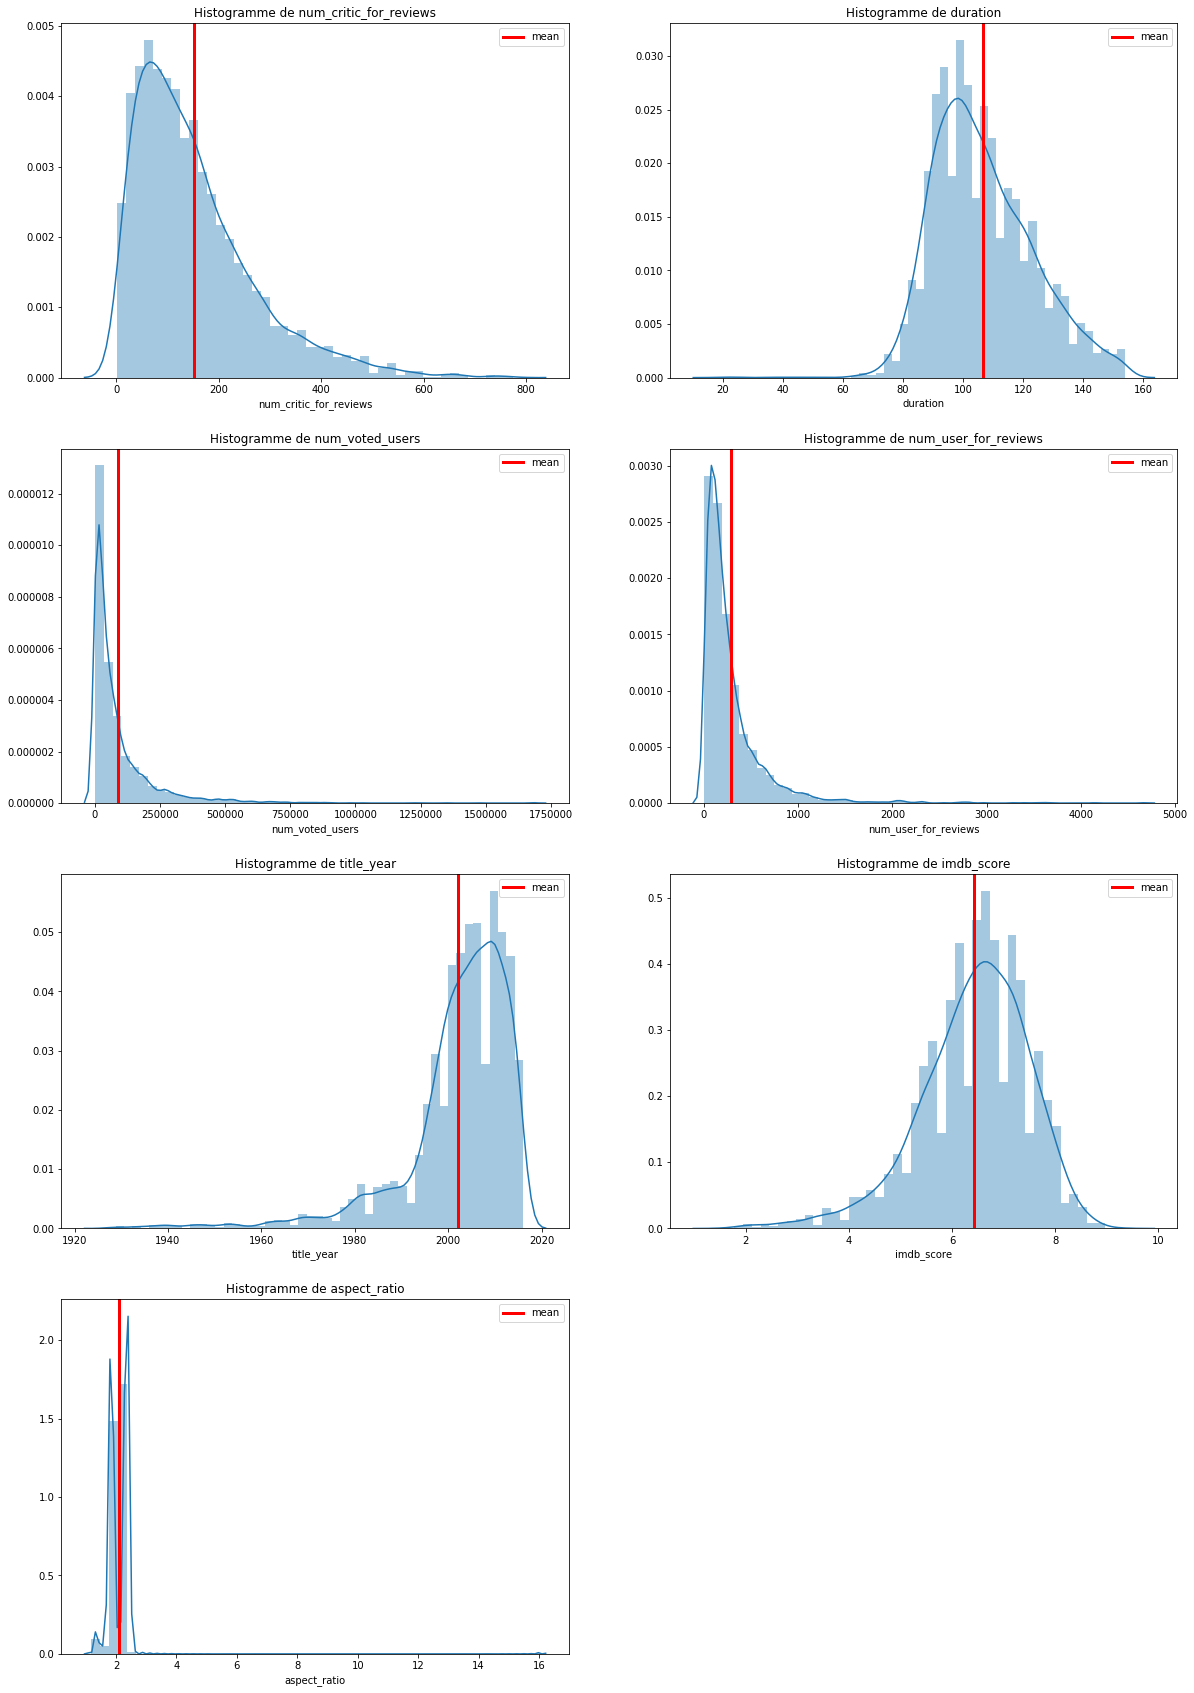

In [5]:

fig=plt.figure(figsize=(20,30))
i=1
for c in data.columns:
    if(data[c].dtype==int) or (data[c].dtype==float):
       ax=fig.add_subplot(4,2,i)
       sns.distplot(data[c])
       ax.axvline(data[c].mean(),color='red',linewidth=3,label="mean")
       plt.title("Histogramme de {}".format(c))
       plt.legend()
       i+=1

The graphic above shows that the distribution of the variable imdb_score is very closed to gaussian distribution.So we will use the test of Kolmogorov-Smirnov to test this hypothesis.

In [6]:
from scipy.stats import ks_2samp
ks_2samp(data['imdb_score'],list(np.random.normal(data['imdb_score'].mean(),data['imdb_score'].std(),len(data))))

Ks_2sampResult(statistic=0.07053550365652278, pvalue=1.238640943357372e-09)

In [7]:
print(data['imdb_score'].mean())
print(data['imdb_score'].std())

6.423543288511426
1.0668113474792835


So we can accept that imdb_score is a gaussian variable with a about 50% of risk to reject this hypothesis even when it is true.  

imdb_score ~ N(6.42,1.06)

<font color=red> <font size=3> ** Qualitative variables ** </font>

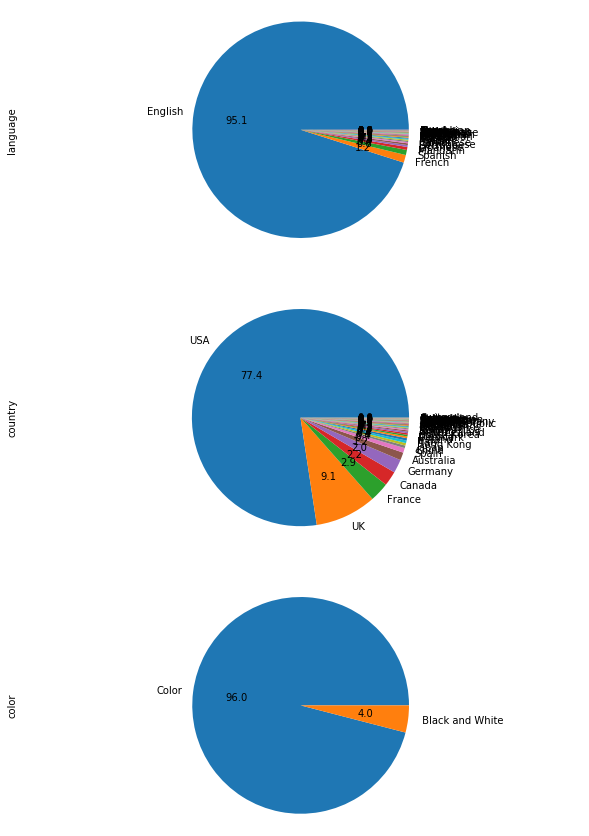

In [8]:
lis=['language','country','color'] # Qualitative variables that we will examinate.
fig=plt.figure(figsize=(10,15))
i=1
for var in lis :
    fig.add_subplot(3,1,i)
    data[var].value_counts(normalize=True).plot("pie",autopct='%1.1f')
    plt.axis("equal")
    
    i+=1

# Multivariate Analyse

In order to examinate the possible relations between variables. We will calculate the table of correlation between them.

In [9]:
data[['num_critic_for_reviews','duration','num_voted_users','title_year','imdb_score','aspect_ratio']].corr()

,num_critic_for_reviews,duration,num_voted_users,title_year,imdb_score,aspect_ratio
num_critic_for_reviews,1.000000,0.260038,0.607177,0.364459,0.330274,0.105293
duration,0.260038,1.000000,0.319825,-0.049988,0.351430,0.113714
num_voted_users,0.607177,0.319825,1.000000,0.047982,0.437528,0.050117
title_year,0.364459,-0.049988,0.047982,1.000000,-0.179491,0.205438
imdb_score,0.330274,0.351430,0.437528,-0.179491,1.000000,-0.010441
aspect_ratio,0.105293,0.113714,0.050117,0.205438,-0.010441,1.000000


So we can conclude from the table above that there is a high correlation of num_voted_users with Simultaneously num_critic_for_reviews and imdb_score.

Text(0.5,1,"num_voted_users'=f('imdb_score')")

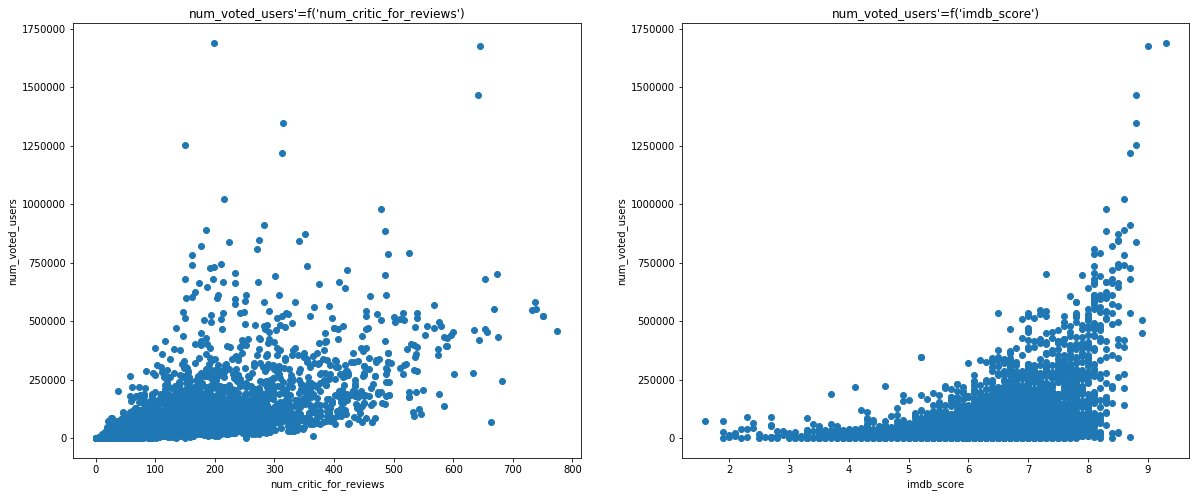

In [10]:
#Visualisation of high correlated variables.
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.scatter(data['num_critic_for_reviews'],data['num_voted_users'])
plt.xlabel('num_critic_for_reviews')
plt.ylabel('num_voted_users')
plt.title("num_voted_users'=f('num_critic_for_reviews')")
fig.add_subplot(1,2,2)
plt.scatter(data['imdb_score'],data['num_voted_users'])
plt.ylabel('num_voted_users')
plt.xlabel('imdb_score')
plt.title("num_voted_users'=f('imdb_score')")

# categorical variables

As it had showed in the univariate analyse, more than 95% of films are in english and about 96% of films are colored films. So we will create a new variables correspondent to three most used languages and  new variables for each  color films.


In [11]:
li_color=list(data['color'].unique()) # list of used color
li_lang=list(data['language'].value_counts().index)[:3] # list of used language


In [12]:
#create new variables correspond to each color.
for c in li_color:
    data[c]=[1 if c==m else 0 for m in data['color']]
del(data['color']) #delete the variable color

In [13]:
#create  new variables correpond to each language.
for c in li_lang:
    data[c]=[1 if c==m else 0 for m in data['language']]
del(data['language']) # delete the variable language.

# Features engineering

We will create new variables from the colone namely genres.Each new colone will take binary values for each film.
1 if the genre of the film correspond to genre mentionned in the column, 0 if it is not.

In [14]:
genres=[]# list of various genres mentionned in this data.
li=[]
for c in data['genres']:
    li=c.split('|')
    genres+=li
genres=np.array(genres)
genres=np.unique(genres)
genres=list(genres)

In [15]:
#Create the new variables
for c in genres:
    data[c]=[1 if c in m else 0 for m in data['genres']]

In [16]:
del(data['genres']) # delete the column "genres" which will be useless.

The column  namely "plot_keywords" is very important variable to give similarity between films. So we will create new variables from this column, correspond to 20% of the most used word.

In [17]:
li_mot=[]# list of key words
for c in data['plot_keywords']:
    li_mot+=c.split('|')
li_key=pd.DataFrame({"mot_clés":li_mot})
li=li_key['mot_clés'].value_counts(normalize=True).cumsum()
i=0
for c in li :
    if c < 0.2:
        i+=1
    else:
        break
mot_retenue=list(li.index)[0:i] # retained words


In [18]:
# Create new variables for the retained key words.
for c in mot_retenue: 
    data[c]=[1 if c in m else 0 for m in data['plot_keywords']]

# Dimensional Reduction:

Our goal is to arrive to recommend for each user five films similars to his research. So, we find that only  new created
variables, can be useful to achieve this goal. Moreover, We need to keep distance between each pair of points if we want
to make dimensional reduction because it is equivalent to similarity between them. Thus we find that TSNE is the best method which could satisfy theises constraints.

In [19]:
#Define useful variables to determinate similarities between films.
variables=genres+mot_retenue+li_lang+li_color
dff=data[variables] # useful data 


In [20]:
#scaling data 
from sklearn.preprocessing import *
scaler=StandardScaler()
df=scaler.fit_transform(dff) #scaled data 

In [21]:
from sklearn.manifold import TSNE 
embedding=TSNE()
df_transformed=embedding.fit_transform(df) # TSNE dimensionnal reduction.

In [22]:
df_transformed

array([[ -6.208484 , -52.0843   ],
       [ 68.62734  ,  -7.52753  ],
       [ -2.3777997,  32.229664 ],
       ...,
       [ 30.257196 , -67.494484 ],
       [ 48.450657 ,   2.8826506],
       [-72.83142  ,  19.459705 ]], dtype=float32)

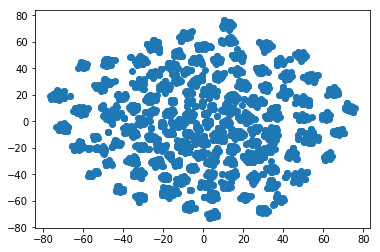

In [23]:
plt.scatter(df_transformed[:,0],df_transformed[:,1]) #Visualisation 

The graphic above show a good separation of many clusters.

# Clustering

Hereunder, we will try to use differents methods of clustering in order to get clustering of our dataset.We will use a silhouette score as a cluster performance evaluation for each used method.

In [24]:
from sklearn.metrics import silhouette_score
from math import ceil

In order to ensure a cluster with more than 5 points to recommond to visiteur. We will define a function,wich allow us from classic unsupervised clustering algorithms to provide cluster with more than 6 points.

In [25]:
def clustering(meth,DF):
    """This function can provides clusters with more than 5 points. it uses the introduced method to cluster 
       the introduced dataset into two clusters in the first iteration. The function continue for each iteration 
       to cluster each obtained cluster which has more than 12 points into two clusters. The function stop when all
       clusters have stricly less than 12 points.
       
       Args:
       meth : the alghorithm that the function, will use to do the target clustering.
       df(DataFrame):The introduced dataset that the function will work on it.
       
       Returns:
       
       cluster(list):list of differents clusters.
       
       """
    clustering=meth  #initiate the introduced clustering algorithm.
    clustering.fit(df) 
    DF=df
    DF['label']=clustering.labels_ # the first two obtained clusters 


    k=0 # value we will use to seperate clusters.
    lg=[100] # list of clusters length for each iteration of our function
    
    while max(lg)>=60: # Runing boucle while there is more than one cluster contain more than 12 points.
        lg=[]
        clusters=np.unique(DF['label'].values)
        for lb in clusters: 
            ddf=DF[DF['label']==lb]
            lg.append(len(ddf)) # add size of each cluster for each iteration clustering.
            if len(ddf)>=12: # size cluster superior than 12
               k+=2          
            
               clustering=meth
               ddf=ddf.iloc[:,:-1]
               clustering.fit(ddf)
               i=0
               for j in ddf.index:
                  DF.iloc[j,-1]=(clustering.labels_[i]+k)
                  i+=1
    le=LabelEncoder()                
    DF['label']=le.fit_transform(DF['label'])
    return DF['label'].values
 

In [26]:
df=pd.DataFrame(df,columns=dff.columns)# transform scaled data to dataframe


<font color='red'><font size=3>**KMeans method:**</font>

In [27]:
from sklearn.cluster import KMeans

In [28]:
label=clustering(KMeans(n_clusters=2),df)    

In [29]:
score_KMeans=silhouette_score(df,label) # computing silhouette score
score_KMeans

0.39354599672346385

The silhouette score of this method is positive. This show that this method allow a good clustering of this dataset.

In [30]:
#compute the number of clusters which contains less than 6 points.
t_clusters=[] #Size for the differents obtained clusters.
for lb in np.unique(label):
    t_clusters.append(len(np.where(label==lb)[0]))
t_clusters=np.array(t_clusters)
cl_KM_6=len(np.where(t_clusters<=6)[0])
cl_KM_6

1197

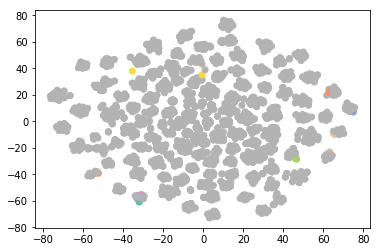

In [31]:
plt.scatter(df_transformed[:,0],df_transformed[:,1],color=plt.cm.Set2(label))

This graphic not allow us to highlight the differents clusters of the KMeans method. Thus, we will try to use the PCA coordinates of points to visualize the clustering of this method.

In [32]:
from sklearn.decomposition import PCA
df_pca=PCA(n_components=2).fit_transform(df)

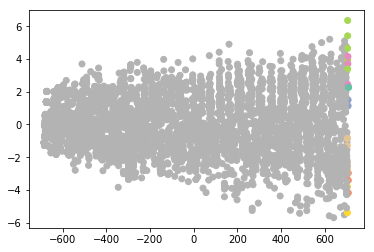

In [33]:
plt.scatter(df_pca[:,0],df_pca[:,1],color=plt.cm.Set2(label))

<font color='red'> <font size=3> ** DBSCAN method: ** </font>

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan=DBSCAN(min_samples=5)
dbscan.fit(df)
lb=dbscan.labels_

In [36]:
score_DB=silhouette_score(df,lb) # computing silhouette_score
score_DB

-0.6355881273578893

The sihouette score of the DBSCAN method for this dataset is negative, which mean that this method can not provide a good clustering of our dataset.

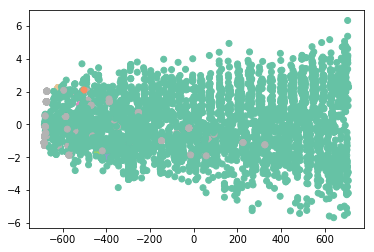

In [37]:
#Visualisation 
from sklearn.decomposition import PCA
df_pca=PCA(n_components=2).fit_transform(df)
plt.scatter(df_pca[:,0],df_pca[:,1],color=plt.cm.Set2(lb))

<font color='red'> <font size=3> ** AgglomerativeClustering method: ** </font>

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:

label_agg=clustering(AgglomerativeClustering(n_clusters=2),df)

In [40]:
score_agg=silhouette_score(df,label_agg) # computing silhouette_score
score_agg

0.38206823789715133

The silhouette score of the AgglomerativeClustering method for our dataset is postive, which mean that this method can provide a performant clustering for our dataset.Above all the silhouette score of this method is praticly the same of the KMeans method.

In [41]:
#compute the number of clusters which contains less than 6 points.
t_clusters=[] #Size for the differents obtained clusters.
for lb in np.unique(label_agg):
    t_clusters.append(len(np.where(label_agg==lb)[0]))
t_clusters=np.array(t_clusters)
cl_AG_6=len(np.where(t_clusters<=6)[0])
cl_AG_6

678

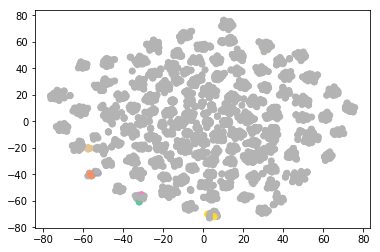

In [42]:
plt.scatter(df_transformed[:,0],df_transformed[:,1],color=plt.cm.Set2(label_agg))# Visualisation

<font color=red> ** Empirical evaluation of differents methods**

**We will hereunder try to evaluate with human evaluation, the result of each method for 5 films randomly taken.So we will choice randomly 5 films, we will see the 5 given films by each method for each film. For each method,we give note of the accuracy of the 5 given film for each first choised film. The global note for each method, will be the average of differents notes taken for each choiced film.**

In [43]:
# We will choice 5 films randomly.
film_alea_choisies=np.random.choice(range(100),5)


In [44]:
#We will define a method, which allow to recommend 5 films for an choiced film using a defined method.
def recommander_5films(clusters,film):
    """This method allow to recommend 5 films for the introduced film. It uses the data set index of the introduced
       film , then it recuperate the label cluster of this film according to the labels of the used method.
       The function, retrieve all films which have same label cluster with the introduced film.The the function
       return after the 5 first films for them.
        
        Args:
        clusters(array): label of each film according to the used method.
        film(int): the index of the introduced film in the data set
        
        """
    cluster_film=clusters[film]
    indices=np.where(clusters==cluster_film)
    indices=indices[0]
    i=0
    for j in indices:
        if j==film:
            break
        i+=1
    indices=np.delete(indices,i)
    
    indices=indices[0:5]
    recommandations=dff.iloc[indices]
    return recommandations

**We will test hereunder the returned films for each choiced film to give an empirical accuracy note for each method**


<font color=green> Film1</font>

In [45]:
ind_film1=film_alea_choisies[0] # index of the first choiced film
dff.iloc[ind_film1] # informations on the first choiced film.

Action                 0
Adventure              1
Animation              1
Biography              0
Comedy                 1
Crime                  0
Documentary            0
Drama                  0
Family                 1
Fantasy                1
Film-Noir              0
History                0
Horror                 0
Music                  1
Musical                1
Mystery                0
News                   0
Romance                1
Sci-Fi                 0
Sport                  0
Thriller               0
War                    0
Western                0
love                   0
friend                 0
murder                 0
death                  0
police                 0
new york city          0
high school            0
                      ..
gangster               0
breasts                0
book                   0
princess               0
critically bashed      0
coach                  0
professor              0
sheriff                0
bank                   0


In [46]:
recommandations=recommander_5films(label,ind_film1) # 5 recommended films for the first choiced film using KMean method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
172,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
249,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
308,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
328,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
636,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0


In [47]:
pertinence_recommandationKM1=1 # KMean accuracy note for the first film.

In [48]:
recommandations=recommander_5films(label_agg,ind_film1) # 5 recommended films for the first choiced film using AgglomerativeClustering.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
172,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
249,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
308,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
328,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
636,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0


In [49]:
pertinence_recommandationAgg1=1 #AgglomerativeClustering accuracy note for the first film.

<font color=green> Film 2 </font>

In [50]:
ind_film2=film_alea_choisies[1] # index of the second choiced film.
dff.iloc[ind_film2] #informations on the second choiced film.

Action                 1
Adventure              1
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Romance                0
Sci-Fi                 0
Sport                  0
Thriller               1
War                    0
Western                0
love                   0
friend                 0
murder                 0
death                  0
police                 0
new york city          0
high school            0
                      ..
gangster               0
breasts                0
book                   0
princess               0
critically bashed      0
coach                  0
professor              0
sheriff                0
bank                   0


In [51]:
recommandations=recommander_5films(label,ind_film2) # 5 recommended films for the second choiced film using KMean method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
144,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
183,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
394,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
672,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
855,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [52]:
pertinence_recommandationKM2=1 # KMean accuracy note for the second film.

In [53]:
recommandations=recommander_5films(label_agg,ind_film2) # 5 recommended films for the second choiced film using AgglomerativeClustering method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
144,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
183,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
394,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
672,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
855,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
pertinence_recommandationAgg2=1 # AgglomerativeClustering accuracy note for the second film.

<font color=green> Film3 </font>

In [55]:
ind_film3=film_alea_choisies[2] #index of the third choiced film.
dff.iloc[ind_film3] #informations of the third choiced film.

Action                 0
Adventure              0
Animation              1
Biography              0
Comedy                 1
Crime                  0
Documentary            0
Drama                  0
Family                 1
Fantasy                1
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Romance                0
Sci-Fi                 0
Sport                  0
Thriller               0
War                    0
Western                0
love                   0
friend                 0
murder                 0
death                  0
police                 0
new york city          0
high school            0
                      ..
gangster               0
breasts                0
book                   0
princess               0
critically bashed      0
coach                  0
professor              0
sheriff                0
bank                   0


In [56]:
recommandations=recommander_5films(label,ind_film3)# 5 recommended films for the second choiced film using KMean method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
702,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
775,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
2054,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [57]:
pertinence_recommandationKM3=1 #KMean accuracy note for the third film.

In [58]:
recommandations=recommander_5films(label_agg,ind_film3)# 5 recommended films for the third choiced film using AgglomerativeClustering method.

recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
702,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
775,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
2054,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [78]:
pertinence_recommandationAgg3=1 # AgglomerativeClustering accuracy note for the third film.

<font color=green> Film4 </font>

In [60]:
ind_film4=film_alea_choisies[3] #index of the fourth choiced film.
dff.iloc[ind_film4] #informations of the fourth choiced film.

Action                 1
Adventure              1
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Romance                0
Sci-Fi                 1
Sport                  0
Thriller               0
War                    0
Western                0
love                   0
friend                 0
murder                 0
death                  0
police                 0
new york city          0
high school            0
                      ..
gangster               0
breasts                0
book                   0
princess               1
critically bashed      0
coach                  0
professor              0
sheriff                0
bank                   0


In [61]:
recommandations=recommander_5films(label,ind_film4) # 5 recommended films for the fourth choiced film using KMean method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
684,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
965,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1448,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1527,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2104,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [62]:
pertinence_recommandationKM4=0.2 #accuracy note for the fourth film.

In [63]:
recommandations=recommander_5films(label_agg,ind_film4) # 5 recommended films for the fourth choiced film using AgglomerativeClustering method.

recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
684,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
965,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1448,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1527,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2104,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [79]:
pertinence_recommandationAgg4=0.2 # AgglomerativeClustering accuracy note for the fourth film.

<font color=green> Film5</font>

In [65]:
ind_film5=film_alea_choisies[4] #index of the fifth choiced film.
dff.iloc[ind_film5] # informations of the fifth choiced film.

Action                 1
Adventure              1
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Romance                0
Sci-Fi                 1
Sport                  0
Thriller               0
War                    0
Western                0
love                   0
friend                 0
murder                 0
death                  0
police                 0
new york city          0
high school            0
                      ..
gangster               0
breasts                0
book                   0
princess               0
critically bashed      0
coach                  0
professor              0
sheriff                0
bank                   0


In [66]:
recommandations=recommander_5films(label,ind_film5) # 5 recommended films for the fifth choiced film using KMean method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
504,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1210,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1559,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2197,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2345,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [80]:
pertinence_recommandationKM5=0.4 #KMean accuracy note for the fifth film.

In [68]:
recommandations=recommander_5films(label_agg,ind_film5) # 5 recommended films for the fifth choiced film using AgglomerativeClustering method.
recommandations

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,soldier,african american,apartment,heist,dream,English,French,Spanish,Color,Black and White
504,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1210,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1559,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2197,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2345,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [81]:
pertinence_recommandationAgg5=0.4 # AgglomerativeClustering accuracy note for the fifth film.

<font color=green> ** KMean accuracy note **

In [82]:
KMean_note=np.mean(np.array([pertinence_recommandationKM1,pertinence_recommandationKM2,pertinence_recommandationKM3,\
                            pertinence_recommandationKM4,pertinence_recommandationKM5]))


<font color=green>**AgglomerativeClustering note **</font>

In [83]:
Agg_note=np.mean(np.array([pertinence_recommandationAgg1,pertinence_recommandationAgg2,pertinence_recommandationAgg3\
                            ,pertinence_recommandationAgg4,pertinence_recommandationAgg5]))

<font color=red><font size=3> ** Selected method: **</font>

In [84]:
#The performance table of each tested method.
table=pd.DataFrame({'KMeans':[score_KMeans,cl_KM_6,KMean_note],'DBSCAN':[score_DB,'-','-'],'Agglomerative':[score_agg,cl_AG_6,Agg_note]}\
                  ,index=['silhouette_score','clusters_6','Empirical accuracy note'])
table

,KMeans,DBSCAN,Agglomerative
silhouette_score,0.393546,-0.635588,0.382068
clusters_6,1197.000000,-,678.000000
Empirical accuracy note,0.720000,-,0.720000


**We find that KMeans and AgglomerativeClustering, give practicaly the same silhoutte score, but the AgglomerativeClustering provide less number of clusters with less than 6 points. So we will use this method as a method clustering of our dataset.**

<font color=red> <font size=3> ** id & cluster of each film: ** </font>

In [73]:
data['id']=[c[26:35] for c in data['movie_imdb_link']] # the id of each film 


In [74]:
data['cluster']=label_agg # the cluster of each film on base of AgglomerativeClustering method

In [75]:
data.to_csv('data_final.csv') 

In [76]:
data.head(50)

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,aspect_ratio,director_name,actor_2_name,actor_1_name,...,gang,male frontal nudity,russian,soldier,african american,apartment,heist,dream,id,cluster
0,602.0,148.0,275868,994.0,2015.0,6.8,2.35,Sam Mendes,Rory Kinnear,Christoph Waltz,...,0,0,0,0,0,0,0,0,tt2379713,179
1,462.0,132.0,212204,738.0,2012.0,6.6,2.35,Andrew Stanton,Samantha Morton,Daryl Sabara,...,0,0,0,0,0,0,0,0,tt0401729,390
2,324.0,100.0,294810,387.0,2010.0,7.8,1.85,Nathan Greno,Donna Murphy,Brad Garrett,...,0,0,0,0,0,0,0,0,tt0398286,32
3,635.0,141.0,462669,1117.0,2015.0,7.5,2.35,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,...,0,0,0,0,0,0,0,0,tt2395427,364
4,375.0,153.0,321795,973.0,2009.0,7.5,2.35,David Yates,Daniel Radcliffe,Alan Rickman,...,0,0,0,0,0,0,0,0,tt0417741,549
5,403.0,106.0,330784,1243.0,2008.0,6.7,2.35,Marc Forster,Mathieu Amalric,Giancarlo Giannini,...,0,0,0,0,0,0,0,0,tt0830515,200
6,313.0,151.0,522040,1832.0,2006.0,7.3,2.35,Gore Verbinski,Orlando Bloom,Johnny Depp,...,0,0,0,0,0,0,0,0,tt0383574,907
7,450.0,150.0,181792,711.0,2013.0,6.5,2.35,Gore Verbinski,Ruth Wilson,Johnny Depp,...,0,0,0,0,0,0,0,0,tt1210819,716
8,733.0,143.0,548573,2536.0,2013.0,7.2,2.35,Zack Snyder,Christopher Meloni,Henry Cavill,...,0,0,0,0,0,0,0,0,tt0770828,518
9,258.0,150.0,149922,438.0,2008.0,6.6,2.35,Andrew Adamson,Pierfrancesco Favino,Peter Dinklage,...,0,0,0,0,0,0,0,0,tt0499448,898


In [77]:
len(np.unique(label_agg)) # the number of obtained clusters

938